# Polfilter

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Dunkelrauschen:

In [48]:
ch1 = np.loadtxt('data/dunkelrauschen/ch1.txt',skiprows=1).T
ch2 = np.loadtxt('data/dunkelrauschen/ch2.txt',skiprows=1).T
diff = np.loadtxt('data/dunkelrauschen/diff.txt',skiprows=1).T
quotient = np.loadtxt('data/dunkelrauschen/quotient.txt',skiprows=1).T

0.005473594227712137
0.0050491682089552235
-0.02198584762996865
-0.04011984630484989


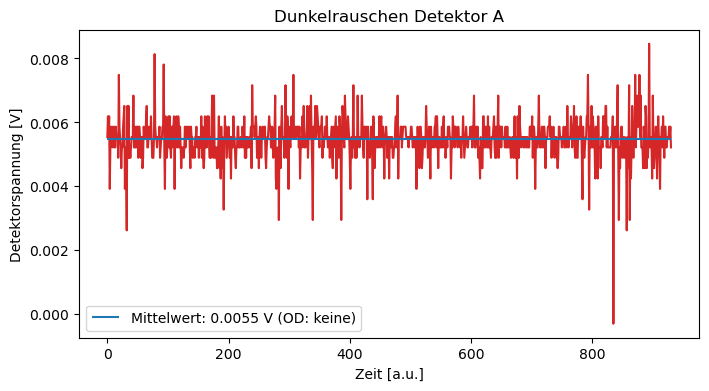

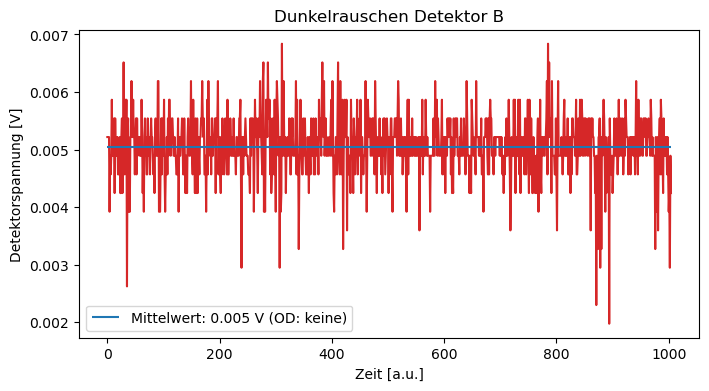

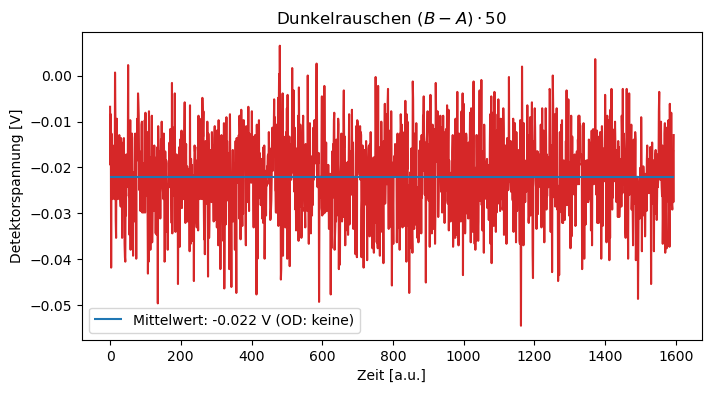

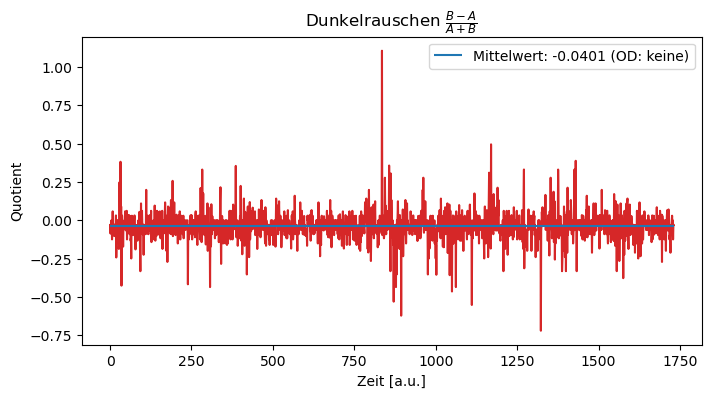

In [49]:
def dunkelrauschen(data,title,quotient=False):    
    plt.figure(figsize=(8,4))
    plt.plot(data[0],data[1],color='tab:red')
    mean = np.mean(data[1])
    print(mean)
    plt.title(title)
    plt.xlabel('Zeit [a.u.]')
    if quotient:
        plt.ylabel('Quotient')
        plt.hlines(mean,xmin=data[0][0],xmax=data[0][-1],color='tab:blue',label=f'Mittelwert: {round(mean,4)} (OD: keine)')
    else:
        plt.ylabel('Detektorspannung [V]')
        plt.hlines(mean,xmin=data[0][0],xmax=data[0][-1],color='tab:blue',label=f'Mittelwert: {round(mean,4)} V (OD: keine)')
    plt.legend()

dunkelrauschen(ch1,'Dunkelrauschen Detektor A')
plt.savefig('figures/optiken/dunkelrauschen_A.pdf')
dunkelrauschen(ch2,'Dunkelrauschen Detektor B')
plt.savefig('figures/optiken/dunkelrauschen_B.pdf')
dunkelrauschen(diff,'Dunkelrauschen $(B-A)\cdot 50$')
plt.savefig('figures/optiken/dunkelrauschen_diff.pdf')
dunkelrauschen(quotient,r'Dunkelrauschen $\frac{B-A}{A+B}$',quotient=True)
plt.savefig('figures/optiken/dunkelrauschen_quotient.pdf')

Polarisatoren:  
Rechnen alle Intensitäten als I_gemessen = I_echt * Transmission

In [50]:
def malus(alpha,I_0,A,B,C):
    alpha = np.radians(alpha)
    return I_0 * np.cos(A*alpha-B)*np.cos(A*alpha-B)+C

def measured_to_real(data,nd):
    '''Rechnet über ND-Wert das echte Signal aus dem gemessenen aus.'''
    transmission = 10**(-nd)
    return data/transmission

[-3.77750859e+03  1.00739791e+00  6.23122544e-01  3.78495233e+03]


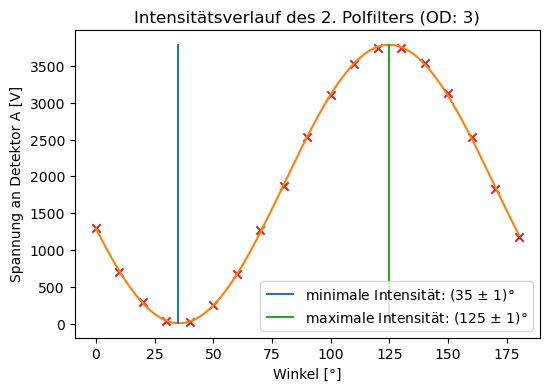

In [51]:
pol2 = np.arange(0,181,10)
pol2_intensity = np.array([1.30,0.70,0.29,0.04,0.03,0.25,0.68,1.27,1.87,2.54,3.11,3.52,3.74,3.74,3.54,3.13,2.54,1.83,1.18])
pol2_intensity = measured_to_real(pol2_intensity,3)

popt, pcov = curve_fit(malus,pol2,pol2_intensity,p0=[3500,1,1,1])
I_0, A, B, C = popt
print(popt)

# Scatter-Plot Daten
plt.figure(figsize=(6,4))
plt.xlabel('Winkel [°]')
plt.ylabel('Spannung an Detektor A [V]')
plt.title('Intensitätsverlauf des 2. Polfilters (OD: 3)')
plt.scatter(pol2,pol2_intensity,marker='x',color='tab:red')

# Fit Malus-Gesetz
xfit = np.arange(0,181,1)
yfit = malus(xfit,I_0,A,B,C)
plt.plot(xfit,yfit,color='tab:orange')

min_index = np.argmin(yfit)
max_index = np.argmax(yfit)
minimum = xfit[min_index]
maximum = xfit[max_index]
plt.vlines(minimum,ymin=0,ymax=3800,colors='tab:blue',label=f'minimale Intensität: ({minimum} $\pm~1$)°')
plt.vlines(maximum,ymin=0,ymax=3800,colors='tab:green',label=f'maximale Intensität: ({maximum} $\pm~1$)°')


plt.legend()
plt.savefig('figures/optiken/polfilter.pdf')

In [52]:
offset_pol = maximum-130
print('Offset Polfilter:',offset_pol)
print('Offset Fehler (Addiere Einstellgenauigkeiten):',2)

max_int = np.max(yfit)
min_int = np.min(yfit)
extinktion = max_int/min_int
print('I_max:',max_int)
print('I_min:',min_int)
print('Extinktionsverhältnis:',extinktion)
# Fehler Extinktionsverhältnis:
error_min = max([yfit[min_index-1]-min_int,yfit[min_index+1]-min_int])
print('Fehler minimale Intensität:',error_min)
error_max = max([max_int-yfit[max_index-1],max_int-yfit[max_index+1]])
print('Fehler maximale Intensität:',error_max)
error_extinktion = error_max/min_int + error_min*max_int/min_int/min_int
print('Fehler Extinktionsverhältnis:',error_extinktion)

Offset Polfilter: -5
Offset Fehler (Addiere Einstellgenauigkeiten): 2
I_max: 3784.8953891515735
I_min: 7.6699252078292375
Extinktionsverhältnis: 493.47226818953357
Fehler minimale Intensität: 2.195174883868276
Fehler maximale Intensität: 1.6832398085643945
Fehler Extinktionsverhältnis: 141.45394373810348


Verzögerungsplättchen (kein ND-Filter):

In [53]:
lambda_halbe_winkel = np.array([120,121,122,123,124,125,126,127,128,129,130])
lambda_halbe = np.array([2.32,1.65,1.08,0.71,0.43,0.17,0.03,0.02,0.13,0.25,0.64])
lambda_viertel_winkel = np.array([120,122,124,126,128,130,132])
lambda_viertel = np.array([1.26,0.64,0.21,0.04,0.03,0.21,0.61])

def x2(x,A,B,C):
    return A*(x-B)**2+C

[5.17132866e-02 1.26637525e+02 1.96530566e-02]
Offset Lambda/2: -3
Offset Fehler (Addiere Einstellgenauigkeiten): 2
[ 2.52083334e-02  1.27059032e+02 -3.03427620e-03]
Offset Lambda/2: -3
Offset Fehler (Addiere Einstellgenauigkeiten): 2


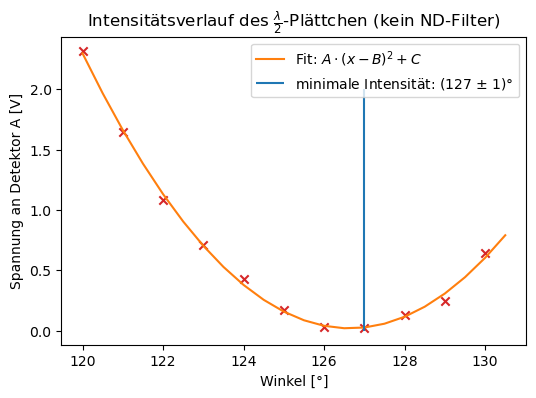

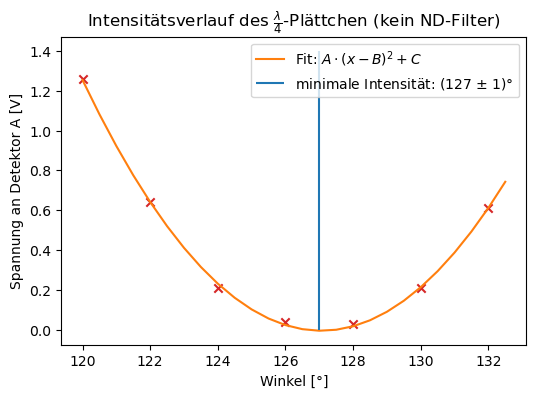

In [54]:
plt.figure(figsize=(6,4))
plt.scatter(lambda_halbe_winkel,lambda_halbe,marker='x',color='tab:red')
plt.xlabel('Winkel [°]')
plt.ylabel('Spannung an Detektor A [V]')
plt.title(r'Intensitätsverlauf des $\frac{\lambda}{2}$-Plättchen (kein ND-Filter)')

popt, pcov = curve_fit(x2,lambda_halbe_winkel,lambda_halbe,p0=[1,1,1])
A, B, C = popt
print(popt)
xfit = np.arange(120,131,0.5)
yfit = x2(xfit,A,B,C)
plt.plot(xfit,yfit,color='tab:orange',label='Fit: $A\cdot (x-B)^2+C$')
min_index = np.argmin(yfit)
minimum = round(xfit[min_index]+0.1)  # Python rundet bei .5 noch immer ab...
plt.vlines(minimum,ymin=0,ymax=2,colors='tab:blue',label=f'minimale Intensität: ({minimum} $\pm~1$)°')
plt.legend()
plt.savefig('figures/optiken/lambda2_int.pdf')

offset_halbe = minimum-130
print('Offset Lambda/2:',offset_halbe)
print('Offset Fehler (Addiere Einstellgenauigkeiten):',2)



plt.figure(figsize=(6,4))
plt.scatter(lambda_viertel_winkel,lambda_viertel,marker='x',color='tab:red')
plt.xlabel('Winkel [°]')
plt.ylabel('Spannung an Detektor A [V]')
plt.title(r'Intensitätsverlauf des $\frac{\lambda}{4}$-Plättchen (kein ND-Filter)')

popt, pcov = curve_fit(x2,lambda_viertel_winkel,lambda_viertel,p0=[1,1,1])
A, B, C = popt
print(popt)
xfit = np.arange(120,133,0.5)
yfit = x2(xfit,A,B,C)
plt.plot(xfit,yfit,color='tab:orange',label='Fit: $A\cdot (x-B)^2+C$')
min_index = np.argmin(yfit)
minimum = round(xfit[min_index])
plt.vlines(minimum,ymin=0,ymax=1.4,colors='tab:blue',label=f'minimale Intensität: ({minimum} $\pm~1$)°')
plt.legend()
plt.savefig('figures/optiken/lambda4_int.pdf')

offset_viertel = minimum-130
print('Offset Lambda/2:',offset_viertel)
print('Offset Fehler (Addiere Einstellgenauigkeiten):',2)